In [100]:
# Global imports of all libraries

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

import numpy as np
import matplotlib.pyplot as plt

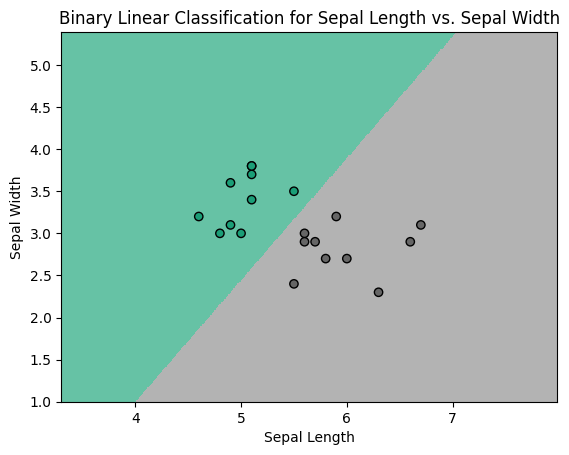

In [101]:
#### Assignment 3: Problem 2: Question 1 Code

# Load the iris dataset from sklearn
X, y = datasets.load_iris(return_X_y=True)

# Only need the first 2 dimensions
X = X[:100,:2]
y = y[:100]

# Training and test split from problem instructions
split = train_test_split(X, y, test_size=0.8, random_state=0)

# Training data
trainingData = split[0]
trainingTargets = split[2]

# Testing data
testingData = split[1]
testingTargets = split[3]

# Initialize the Binary Linear Classifier
binaryLinearClassifier = LogisticRegression()

# Fit the data on training data
binaryLinearClassifier.fit(trainingData, trainingTargets)

# Get the min and max x and y values from the data
xMin = testingData[:,0].min()-1
xMax = testingData[:,0].max()+1

yMin = testingData[:,1].min()-1
yMax = testingData[:,1].max()+1

# Step value
step = 0.01

# Create coordinate matrix
xValues, yValues = np.meshgrid(np.arange(xMin, xMax, step), np.arange(yMin, yMax, step))

# Predict using the BLC classifier
blcPrediction = binaryLinearClassifier.predict(np.c_[xValues.ravel(), yValues.ravel()])
blcPrediction = blcPrediction.reshape(xValues.shape)

plt.pcolormesh(xValues, yValues, blcPrediction, cmap=plt.cm.Set2)

# Plot the data
plt.scatter(trainingData[:,0], trainingData[:,1], c=trainingTargets, edgecolors='k', cmap=plt.cm.Dark2)

# Only show plot between min and max values
plt.xlim(xValues.min(), xValues.max())
plt.ylim(yValues.min(), yValues.max())

# Label the axis
plt.title('Binary Linear Classification for Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

In [102]:
#### Assignment 3: Problem 2: Question 2 Code

# Training Accuracy
trainingAccuracy = binaryLinearClassifier.score(trainingData, trainingTargets)
print("Training Accuracy = " + str(trainingAccuracy*100) + '%')

# Testing Accuracy
testingAccuracy = binaryLinearClassifier.score(testingData, testingTargets)
print("Testing Accuracy = " + str(testingAccuracy*100) + '%')

Training Accuracy = 100.0%
Testing Accuracy = 98.75%


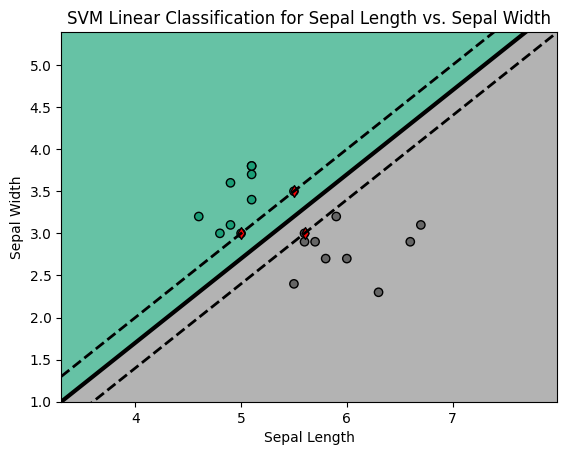

In [103]:
#### Assignment 3: Problem 2: Question 3 Code

# Function to normalize the coefficients
def normalize(array):
    sum = 0
    for value in array:
        sum += np.power(value,2)
    return np.power(sum, 1/2)

# Initialize the Support Vector Machine (SVC) Classifier
supportVectorMachineClassifier = svm.SVC(kernel="linear", C=100)

# Fit the data on training data
supportVectorMachineClassifier.fit(trainingData, trainingTargets)

# Predict using the SVM classifier
svcPrediction = supportVectorMachineClassifier.predict(np.c_[xValues.ravel(), yValues.ravel()])
svcPrediction = svcPrediction.reshape(xValues.shape)

# Get the coefficient values
coefficientValues = supportVectorMachineClassifier.coef_

# Normalize the coefficient values
normalizedCoefficients = 1/normalize(coefficientValues[0])

# Get the slope value
slopeValue = -(coefficientValues[0][0]/coefficientValues[0][1])

# Calculate the vertical offset of margins
verticalOffset = normalizedCoefficients * np.power(1+np.power(slopeValue,2), 1/2)

# Get the intercept value
interceptValue = -supportVectorMachineClassifier.intercept_[0]/supportVectorMachineClassifier.coef_[0][1]

# Plot 
plt.pcolormesh(xValues, yValues, svcPrediction, cmap=plt.cm.Set2)

# Plot the data
plt.scatter(trainingData[:,0], trainingData[:,1], c=trainingTargets, edgecolors='k', cmap=plt.cm.Dark2)

# Only show plot between min and max values
plt.xlim(xValues.min(), xValues.max())
plt.ylim(yValues.min(), yValues.max())

# Label the axis
plt.title('SVM Linear Classification for Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Plot the SVC Margin Line for the top
xLine = np.linspace(xMin, xMax, 50)
yLine = slopeValue*xLine + interceptValue - verticalOffset
plt.plot(xLine,yLine, 'k--', label='Margin', linewidth=2)

# Plot the SVC Decision Boundary Line
xLine = np.linspace(xMin, xMax, 50)
yLine = slopeValue*xLine + interceptValue
plt.plot(xLine,yLine, 'k', label='Decision Boundary', linewidth=3)

# Plot the SVC Margin Line for the bottom
xLine = np.linspace(xMin, xMax, 50)
yLine = slopeValue*xLine + interceptValue + verticalOffset
plt.plot(xLine,yLine, 'k--', label='Margin', linewidth=2)

# Plot the support vectors
plt.scatter(supportVectorMachineClassifier.support_vectors_[:,0], supportVectorMachineClassifier.support_vectors_[:,1], edgecolors='k', facecolors='red', marker='d', label='Support Vectors')

plt.show()

In [104]:
#### Assignment 3: Problem 2: Question 4 Code

'''
The support vectors vectors are circled and coloured red in the plot. They are on the margin lines.
We can identify them using the KKT Conditions:
When y(i)(wx(i)+b)-1<0, then alpha(i)=0

When y(i)(wx(i)+b)-1=0, then alpha(i) will be non-zero. Here, these examples of (x(i), y(i)) are the
support vectors while lie on the target margin
'''
plt.show()

In [105]:
#### Assignment 3: Problem 2: Question 5 Code

# Training Accuracy
trainingAccuracy = supportVectorMachineClassifier.score(trainingData, trainingTargets)
print("Training Accuracy = " + str(trainingAccuracy*100) + '%')

# Testing Accuracy
testingAccuracy = supportVectorMachineClassifier.score(testingData, testingTargets)
print("Testing Accuracy = " + str(testingAccuracy*100) + '%')

Training Accuracy = 100.0%
Testing Accuracy = 100.0%


In [106]:
#### Assignment 3: Problem 2: Question 6 Code

# Value of the margin is the vertical offset
print("Value of the margin: " + str(verticalOffset))

'''
The equation of the Decision Boundary/Hyperplane is wx+b=0.
The equation of the negative margin is wx+b=-1
The equation of the positive margin is wx+b=1

Total distance from positive to negative margin is 2/||w|| = c where we are trying to minize w
Here c is the min distance between the training point x(i) and the decision boundary

In my calculation vertical offset = c/2 = 0.29999160820412285
'''

Value of the margin: 0.29999160820412285


'\nThe equation of the Decision Boundary/Hyperplane is wx+b=0.\nThe equation of the negative margin is wx+b=-1\nThe equation of the positive margin is wx+b=1\n\nTotal distance from positive to negative margin is 2/||w|| = c where we are trying to minize w\nHere c is the min distance between the training point x(i) and the decision boundary\n\nIn my calculation vertical offset = c/2 = 0.29999160820412285\n'

In [107]:
#### Assignment 3: Problem 2: Question 7 Explanation
'''
The weight vector w is orthogonal to the the hyperplane/decision boundary.
'''

'\nThe weight vector w is orthogonal to the the hyperplane/decision boundary.\n'

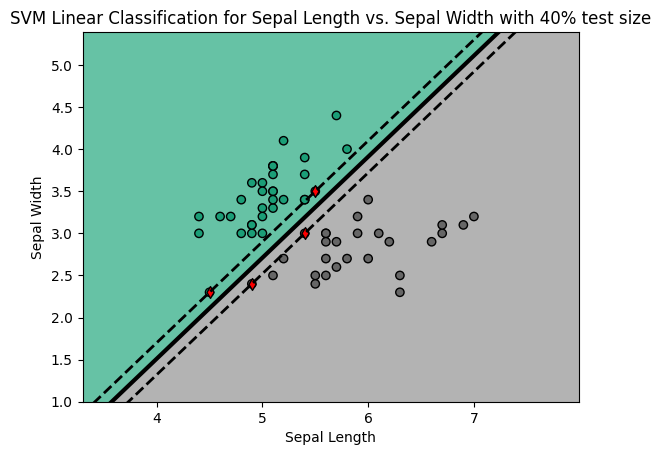

Training Accuracy = 100.0%
Testing Accuracy = 100.0%


'\nQ. Does the decision boundary change?\n\nYes it does change. Now it has lower bias and double the weights creating a new decision boundary.\nThe margin length has also decreased\n\nQ. How about the test accuracy?\n\nNo it stays the same. Both the training and test accuracy. Because it still used support vectors\nto create the boundary and as long as there are no data points on the other side of the decision\nboundary, then the support vectors will ensure that the boundary is 100% accurate.\n\n'

In [108]:
#### Assignment 3: Problem 2: Question 8 Code

# Training and test split as 0.4 from 2.8 instructions
split = train_test_split(X, y, test_size=0.4, random_state=0)

# Training data
trainingData = split[0]
trainingTargets = split[2]

# Testing data
testingData = split[1]
testingTargets = split[3]

# Get the min and max x and y values from the data
xMin = testingData[:,0].min()-1
xMax = testingData[:,0].max()+1

yMin = testingData[:,1].min()-1
yMax = testingData[:,1].max()+1

# Initialize the Support Vector Machine (SVC) Classifier
supportVectorMachineClassifier = svm.SVC(kernel="linear", C=100)

# Fit the data on training data
supportVectorMachineClassifier.fit(trainingData, trainingTargets)

# Predict using the SVM classifier
svcPrediction = supportVectorMachineClassifier.predict(np.c_[xValues.ravel(), yValues.ravel()])
svcPrediction = svcPrediction.reshape(xValues.shape)

# Get the coefficient values
coefficientValues = supportVectorMachineClassifier.coef_

# Normalize the coefficient values
normalizedCoefficients = 1/normalize(coefficientValues[0])

# Get the slope value
slopeValue = -(coefficientValues[0][0]/coefficientValues[0][1])

# Calculate the vertical offset of margins
verticalOffset = normalizedCoefficients * np.power(1+np.power(slopeValue,2), 1/2)

# Get the intercept value
interceptValue = -supportVectorMachineClassifier.intercept_[0]/supportVectorMachineClassifier.coef_[0][1]

# Plot 
plt.pcolormesh(xValues, yValues, svcPrediction, cmap=plt.cm.Set2)

# Plot the data
plt.scatter(trainingData[:,0], trainingData[:,1], c=trainingTargets, edgecolors='k', cmap=plt.cm.Dark2)

# Only show plot between min and max values
plt.xlim(xValues.min(), xValues.max())
plt.ylim(yValues.min(), yValues.max())

# Label the axis
plt.title('SVM Linear Classification for Sepal Length vs. Sepal Width with 40% test size')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Plot the SVC Margin Line for the top
xLine = np.linspace(xMin, xMax, 50)
yLine = slopeValue*xLine + interceptValue - verticalOffset
plt.plot(xLine,yLine, 'k--', label='Margin', linewidth=2)

# Plot the SVC Decision Boundary Line
xLine = np.linspace(xMin, xMax, 50)
yLine = slopeValue*xLine + interceptValue
plt.plot(xLine,yLine, 'k', label='Decision Boundary', linewidth=3)

# Plot the SVC Margin Line for the bottom
xLine = np.linspace(xMin, xMax, 50)
yLine = slopeValue*xLine + interceptValue + verticalOffset
plt.plot(xLine,yLine, 'k--', label='Margin', linewidth=2)

# Plot the support vectors
plt.scatter(supportVectorMachineClassifier.support_vectors_[:,0], supportVectorMachineClassifier.support_vectors_[:,1], edgecolors='k', facecolors='red', marker='d', label='Support Vectors')

plt.show()

# Training Accuracy of 40% test size
trainingAccuracy = supportVectorMachineClassifier.score(trainingData, trainingTargets)
print("Training Accuracy = " + str(trainingAccuracy*100) + '%')

# Testing Accuracy 40% test size
testingAccuracy = supportVectorMachineClassifier.score(testingData, testingTargets)
print("Testing Accuracy = " + str(testingAccuracy*100) + '%')

'''
Q. Does the decision boundary change?

Yes it does change. Now it has lower bias and double the weights creating a new decision boundary.
The margin length has also decreased

Q. How about the test accuracy?

No it stays the same. Both the training and test accuracy. Because it still used support vectors
to create the boundary and as long as there are no data points on the other side of the decision
boundary, then the support vectors will ensure that the boundary is 100% accurate.

'''

In [109]:
#### Assignment 3: Problem 2: Question 9 Explanation

'''
No the linear classifier and the SVM have different decision boundaries with different slopes and
bias values.
'''

'\nNo the linear classifier and the SVM have different decision boundaries with different slopes and\nbias values.\n'